## Notebook to prototype Chip Counting Algorithm
Given image, output the number of chips present

Potential Problems:
* Overlapping Chips
* Different Coloured Chips

In [3]:
import cv2 as cv
import os
import numpy as np
import pandas as pd
from helper_functions import read_imgs
import matplotlib.pyplot as plt

In [9]:
img_list = read_imgs(r"/Users/bryanwhl/Documents/nus-sds-dsc2021/train_data/train_images/")

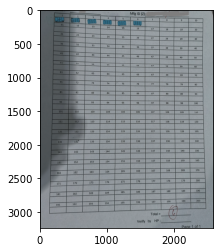

In [15]:
plt.imshow(img_list[115])
plt.show()

In [11]:
df = pd.read_csv(r"/Users/bryanwhl/Documents/nus-sds-dsc2021/train_data/train_labels.csv")
df

,img_id,object_count_gt,handwritten_count_gt,anomalies_bbox_gt
0,1001,80,80,[]
1,1002,6,6,[]
2,1003,51,52,"[('black_spot', [67, 44, 27, 16])]"
3,1004,24,24,[]
4,1005,77,77,[]
...,...,...,...,...
111,1112,200,-1,[]
112,1113,200,-1,[]
113,1114,198,-1,[]
114,1115,200,-1,[]


In [12]:
pred = []
for i in range(len(img_list)):
    count = 0
    img = cv.resize(img_list[i].copy(), (round(440*0.9), round(610*0.9)))
    lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
    l, a, b = cv.split(lab)

    ret, th = cv.threshold(b, 145, 255, cv.THRESH_BINARY);
#     ret, th = cv.threshold(b, 127, 255, cv.THRESH_OTSU);
    
    contours, hierarchy = cv.findContours(th, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(img)
    for cnt in contours:
        approx = cv.approxPolyDP(cnt, 0.01 * cv.arcLength(cnt, True), True)
        area = cv.contourArea(approx)
        if 150 < area:
            cv.drawContours(mask, [approx], -1, (0, 255, 0), 1)
            count += area//100
        elif 50 < area < 150:
            cv.drawContours(mask, [approx], -1, (0, 255, 0), 1)
            count += 1
        else:
            cv.drawContours(mask, [approx], -1, (255, 0, 0), 1)
    pred.append(int(count))


#     th = cv.cvtColor(th, cv.COLOR_GRAY2BGR)
#     b = cv.cvtColor(b, cv.COLOR_GRAY2BGR)
    
#     cv.imshow("window", cv.hconcat([th, img, b]))
#     cv.waitKey(0)
#     cv.destroyAllWindows()
    

In [14]:
error = 0
for i in range(len(pred)):
    error += abs(pred[i] - df["object_count_gt"][i])
    print(pred[i])
    print(df["object_count_gt"][i])
    print("\n")
    
print(error)

141
80


213
6


121
51


195
24


7
77


29
47


33
67


220
30


126
45


380
8


342
32


58
9


35
48


214
6


28
124


384
71


30
83


50
29


374
139


148
30


371
153


149
35


34
58


103
7


101
200


30
200


378
128


371
68


228
200


367
200


137
121


158
33


433
375


117
375


70
375


175
214


278
341


80
251


135
300


184
375


406
375


675
265


190
100


281
177


27
126


83
375


147
375


378
98


260
106


109
285


100
375


355
149


76
375


125
188


83
256


54
61


61
375


267
76


138
146


96
84


53
5


233
84


81
3


69
24


170
48


20
20


159
49


196
480


259
113


174
97


75
14


137
123


24
162


20
3


14
10


207
107


213
68


94
83


27
120


165
60


10
42


5
34


106
197


97
27


101
34


2
135


181
118


172
130


168
152


125
71


85
55


166
157


150
57


129
84


108
86


3
44


52
119


251
80


23
65


8
170


32
20


76
125


296
51


46
250


67
62


47
123


9
93


71
116


7
60


91
200


83
200


122
200


1

In [6]:
# 32 for merge issue
img = cv.resize(img_list[31].copy(), (round(440*0.9), round(610*0.9)))
count = 0

lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
l, a, b = cv.split(lab)

ret, th = cv.threshold(b, 145, 255, cv.THRESH_BINARY);
# ret, th = cv.threshold(b, 0, 255, cv.THRESH_OTSU);

contours, hierarchy = cv.findContours(th, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(img)
# x = cv.drawContours(mask, contours, -1, (0, 255, 0), 1)
for cnt in contours:
    approx = cv.approxPolyDP(cnt, 0.01 * cv.arcLength(cnt, True), True)
    area = cv.contourArea(approx)
    if 150 < area:
        cv.drawContours(mask, [approx], -1, (0, 255, 0), 1)
        count += area//100
        print(area, area//100)
    elif 50 < area < 150:
        cv.drawContours(mask, [approx], -1, (0, 0, 255), 1)
        count += 1
    else:
        cv.drawContours(mask, [approx], -1, (255, 0, 0), 1)

print(count)

183.5 1.0
197.5 1.0
154.5 1.0
175.0 1.0
168.0 1.0
174.5 1.0
162.5 1.0
172.5 1.0
169.0 1.0
167.5 1.0
183.0 1.0
154.5 1.0
192.0 1.0
170.5 1.0
165.0 1.0
156.5 1.0
171.0 1.0
165.5 1.0
152.0 1.0
160.5 1.0
157.0 1.0
154.5 1.0
162.0 1.0
178.5 1.0
152.0 1.0
152.5 1.0
156.5 1.0
162.0 1.0
180.5 1.0
157.0 1.0
155.5 1.0
151.0 1.0
159.0 1.0
195.5 1.0
161.0 1.0
168.5 1.0
167.5 1.0
164.0 1.0
156.5 1.0
167.5 1.0
163.5 1.0
162.0 1.0
158.5 1.0
195.0 1.0
190.5 1.0
175.5 1.0
156.0 1.0
159.0 1.0
173.5 1.0
162.0 1.0
192.0 1.0
166.5 1.0
158.0 1.0
195.5 1.0
186.5 1.0
199.0 1.0
158.5 1.0
156.5 1.0
164.5 1.0
167.5 1.0
164.5 1.0
174.5 1.0
167.5 1.0
187.0 1.0
204.0 2.0
174.0 1.0
166.0 1.0
162.5 1.0
167.5 1.0
166.5 1.0
171.0 1.0
172.5 1.0
198.0 1.0
166.5 1.0
188.5 1.0
205.5 2.0
164.5 1.0
160.5 1.0
165.0 1.0
163.5 1.0
159.5 1.0
155.5 1.0
178.5 1.0
175.5 1.0
185.0 1.0
158.0 1.0
162.5 1.0
153.5 1.0
160.0 1.0
168.0 1.0
173.5 1.0
185.5 1.0
189.0 1.0
153.5 1.0
162.0 1.0
165.5 1.0
166.0 1.0
153.5 1.0
181.5 1.0
185.0 1.0


In [ ]:
th = cv.cvtColor(th, cv.COLOR_GRAY2BGR)
b = cv.cvtColor(b, cv.COLOR_GRAY2BGR)
cv.imshow("window", cv.hconcat([th, img, b]))
# cv.imshow("window", mask)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
# img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# blur = cv.bilateralFilter(img,30,40,40)

# th = cv.adaptiveThreshold(blur, maxValue=255, blockSize=11, adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv.THRESH_BINARY, C=2)
# img_morph = cv.morphologyEx(th, cv.MORPH_CLOSE, (5,5), iterations=1)

# # dst = img_morph

# contours, hierarchy = cv.findContours(img_morph, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
# mask = np.zeros_like(img_list[0].copy())
# # cv.drawContours(mask, contours, -1, (0, 255, 0), 1)
# for cnt in contours:
#     approx = cv.approxPolyDP(cnt, 0.01 * cv.arcLength(cnt, True), True)
#     if (len(approx) != 4):
#         continue
#     cv.drawContours(mask, [approx], -1, (0, 255, 0), 1)

# dst = cv.Canny(blur, threshold1=5, threshold2=50, edges=None, apertureSize=5)
# lines = cv.HoughLines(dst, rho=1, theta=np.pi/180, threshold=150, lines=None, srn=0, stn=0,)# min_theta=0, max_theta=np.pi/2+0.2)
# lines = cv.HoughLinesP(dst, rho=1, theta=np.pi/180, threshold=50, lines=None, minLineLength=100, maxLineGap=100)

# if lines is not None:
#     for i in range(0, len(lines)):
#         line = lines[i][0]
#         cv.line(img, (line[0], line[1]), (line[2], line[3]), (0,0,255),1)

# for rho,theta in lines[0]:
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))
#     cv.line(img,(x1,y1),(x2,y2),(0,0,255),3)

# len(lines)